In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_excel(open('../Data/DatasetPQR2019.xlsx', 'rb'), sheet_name='BASE 2019 F')

In [3]:
df1.head()

,NomGrupoRadicador,NomEmpleadoRad,fechaRadicacion,AñoRadica,MesRadica,DiaRadica,SitioRecepcion,MedioRecepcion,Prioridad,SucursalClasificacion,...,comentariosCliente2,ResponsableInicial,GrupoResponsableInicial,nombCategoriaInicial,nombAreaInicial,nombCausaInicial,histPQR,hechoPor,nombreCoordinacionResponsableActual,Tipopqr
0,DP Y QS RS,Hector Camilo Olivares Garzon,2019-01-02 08:24:56.487000000,2019,Enero,2,SUPERSALUD CERRADOS,Requerimientos Otros Entes de Control,NaN,BOGOTA SUBSIDIADO,...,"ciembre del año en curso mi hermano, el señor ...",DP Y QS RS,DP Y QS RS,QUEJA,7. NEGACIÓN DE SERVICIOS,g. Urgencias.,1,KarolDR,PQRD BOGOTÁ,REGULARES
1,DP Y QS RS,Hector Camilo Olivares Garzon,2019-01-02 08:43:03.550000000,2019,Enero,2,SUPER REQ. SIS RIESGO DE VIDA,Requerimientos Otros Entes de Control,Mayor 60 años,BOGOTA SUBSIDIADO,...,ón:el reclamo lo realizo en nombre de mi madre...,DP Y QS RS,DP Y QS RS,QUEJA,8. OPORTUNIDAD CITAS RED CONTRATADA,Programación De Cirugías,1,FrancelyAL,PQRD BOGOTÁ,RIESGO DE VIDA
2,DP Y QS RS,Hector Camilo Olivares Garzon,2019-01-02 08:47:40.297000000,2019,Enero,2,SUPER REQ. SIS RIESGO DE VIDA,Requerimientos Otros Entes de Control,Mayor 60 años,BOGOTA SUBSIDIADO,...,ón:desde hace varios meses me apareció un gran...,DP Y QS RS,DP Y QS RS,QUEJA,2. DIFICULTAD ACCESIBILIDAD ADMINISTRATIVA,b. Inoportunidad autorizaciones,1,LuzMV,PQRD BOGOTÁ,RIESGO DE VIDA
3,DP Y QS RS,Hector Camilo Olivares Garzon,2019-01-02 08:51:47.790000000,2019,Enero,2,SUPER REQ. SIS RIESGO DE VIDA,Requerimientos Otros Entes de Control,NaN,BOGOTA SUBSIDIADO,...,ón:wilson devia martinez 44 años c.c. 93392341...,DP Y QS RS,DP Y QS RS,QUEJA,7. NEGACIÓN DE SERVICIOS,f. Remisión inter-hospitalaria.,1,LuisRR,PQRD BOGOTÁ,RIESGO DE VIDA
4,DP Y QS RS,Hector Camilo Olivares Garzon,2019-01-02 09:02:14.033000000,2019,Enero,2,SUPERSALUD CERRADOS,Requerimientos Otros Entes de Control,Mayor 60 años,BOGOTA SUBSIDIADO,...,10:22:48 amvencimiento2019-01-08 11:59:58 pmes...,DP Y QS RS,DP Y QS RS,QUEJA,4. DIFICULTAD TUTELAS,h.Elementos de higiene,1,AnyelaMC,PQRD BOGOTÁ,REGULARES


In [4]:
df1 = df1.replace(np.nan,'')
df1['Comentario'] = df1['comentariosCliente1'] + ' ' +df1['comentariosCliente2']
df1['Vigencia'] = 2019
df1['Area'] = df1['nombAreaInicial'].apply(lambda l: re.sub("[^a-zA-Záéíó \n]", "", l.title()).strip())

In [5]:
df1 = df1.loc[:, ['Comentario','Area']]
df1 = df1[df1.Comentario != '']

In [6]:
df1

,Comentario,Area
0,pqrd-18-0674823nurc 1-2018-221502entidad: capi...,Negación De Servicios
1,pqrd-18-0675272nurc 1-2018-216612entidad: capi...,Oportunidad Citas Red Contratada
2,pqrd-18-0675410nurc 1-2018-221583entidad: capi...,Dificultad Accesibilidad Administrativa
3,pqrd-18-0675530nurc 1-2018-217812entidad: capi...,Negación De Servicios
4,favor enviar copia al ministerio de salud y pr...,Dificultad Tutelas
...,...,...
37648,para:pqr de:sds asunto:traslado derecho petici...,Oportunidad Citas Red Contratada
37649,para:pqr de:sds asunto:traslado derecho petici...,Dificultad Accesibilidad Administrativa
37650,para: área pqr de: personeria asunto: radicado...,Dificultad Accesibilidad Administrativa
37651,para: area pqr de: elvia sierra ayala asunto: ...,Inconsistencias Sistemas De InformacionAsegura


In [7]:
df2 = pd.read_excel(open('../Data/DatasetPQR2020.xlsx', 'rb'), sheet_name='Hoja1')

In [8]:
df2.head()

,NomGrupoRadicador,NomEmpleadoRad,fechaRadicacion,AñoRadica,MesRadica,DiaRadica,SitioRecepcion,MedioRecepcion,Prioridad,SucursalClasificacion,...,ResponsableInicial,GrupoResponsableInicial,nombCategoriaInicial,nombAreaInicial,nombCausaInicial,histPQR,hechoPor,nombreHechoPor,nombreCoordinacionResponsableActual,tipoPQR
0,NaN,Yuli Johana Melo Ardila,2020-06-10 08:51:49.947000000,2020,Junio,10,VEEDURIA,Email,Tutela,BOGOTA SUBSIDIADO,...,DP Y QS RS,DP Y QS RS,QUEJA,1. ATENCIÓN DESHUMANIZADA,b. Agresión funcionario a usuario en EPS,1,FrancyFM,Francy Johana Fuentes Moreno,PQRD BOGOTÁ,OTROS ENTES
1,ANALISTA PQRD META,Alba Zarate Lozada,2020-01-02 15:22:42.163000000,2020,Enero,2,FRONT DESK VILLAVICENCIO,Buzón,NaN,VILLAVICENCIO SUBSIDIADO,...,SERVICIO AL CLIENTE VILLAVICENCIO EPS-S,SERVICIO AL CLIENTE VILLAVICENCIO EPS-S,QUEJA,1. ATENCIÓN DESHUMANIZADA,b. Agresión funcionario a usuario en EPS,0,AlbaZL,Alba Zarate Lozada,PQRD META,OTROS ENTES
2,ANALISTA PQRD META,Alba Zarate Lozada,2020-02-06 15:22:56.353000000,2020,Febrero,6,FRONT DESK VILLAVICENCIO,Buzón,NaN,VILLAVICENCIO SUBSIDIADO,...,SERVICIO AL CLIENTE VILLAVICENCIO EPS-S,SERVICIO AL CLIENTE VILLAVICENCIO EPS-S,QUEJA,1. ATENCIÓN DESHUMANIZADA,b. Agresión funcionario a usuario en EPS,0,SoniaGP,Sonia Gicela Guerrero Parrado,PQRD META,OTROS ENTES
3,ANALISTA PQRD META,Alba Zarate Lozada,2020-02-06 15:16:37.790000000,2020,Febrero,6,FRONT DESK VILLAVICENCIO,Buzón,NaN,VILLAVICENCIO SUBSIDIADO,...,SERVICIO AL CLIENTE VILLAVICENCIO EPS-S,SERVICIO AL CLIENTE VILLAVICENCIO EPS-S,QUEJA,1. ATENCIÓN DESHUMANIZADA,d. Agresión usuario a funcionario en EPS,0,SoniaGP,Sonia Gicela Guerrero Parrado,PQRD META,OTROS ENTES
4,NaN,Yuli Johana Melo Ardila,2020-02-03 15:35:19.707000000,2020,Febrero,3,PAU CANDELARIA,Buzón,NaN,BOGOTA SUBSIDIADO,...,DP Y QS RS,DP Y QS RS,QUEJA,2. DIFICULTAD ACCESIBILIDAD ADMINISTRATIVA,"Problemas recursos físicos, humanos, dotación",1,NeidaGD,Neida Marleny Garzon Diaz,PQRD BOGOTÁ,OTROS ENTES


In [9]:
df2 = df2.replace(np.nan,'')
df2['Comentario'] = df2['comentariosCliente1'] + ' ' + df2['comentariosCliente2']
df2['Vigencia'] = 2020
df2['Area'] = df2['nombAreaInicial'].apply(lambda l: re.sub("[^a-zA-Záéíó \n]", "", l.title()).strip())

In [10]:
df2 = df2.loc[:, ['Comentario','Area']]
df2 = df2[df2.Comentario != '']
df2

,Comentario,Area
0,"funcionario encargado llamado nicolas ardila, ...",Atención Deshumanizada
1,la funcionaria cenaida del cubiculo de atencio...,Atención Deshumanizada
2,la señora que atiende en la ventanilla 4 llama...,Atención Deshumanizada
3,"la señora diana lorena del modulo 4, es una se...",Atención Deshumanizada
4,para:área pqrde:pau candelariaasunto: buzonfol...,Dificultad Accesibilidad Administrativa
...,...,...
41554,Contactenos Web,Solicitudes Web
41555,Contactenos Web,Solicitudes Web
41556,Contactenos Web,Solicitudes Web
41557,Contactenos Web,Solicitudes Web


In [11]:
df3 = pd.read_excel(open('../Data/DatasetPQR2021.xlsx', 'rb'), sheet_name='Hoja1')

In [12]:
df3.head()

,NomGrupoRadicador,NomEmpleadoRad,fechaRadicacion,AñoRadica,MesRadica,DiaRadica,SitioRecepcion,MedioRecepcion,Prioridad,SucursalClasificacion,...,ResponsableInicial,GrupoResponsableInicial,nombCategoriaInicial,nombAreaInicial,nombCausaInicial,histPQR,hechoPor,nombreHechoPor,nombreCoordinacionResponsableActual,tipoPQR
0,PAU CALLE 73,Ricardo Andres Castellanos Patiño,2021-02-26 09:57:05.780000000,2021,Febrero,26,PAU CALLE 73,Personal,NaN,BOGOTÁ CONTRIBUTIVO,...,DP Y QS RC,DP Y QS RC,DERECHO DE PETICION,2. DIFICULTAD ACCESIBILIDAD ADMINISTRATIVA,Estado de Pagos (Cartera y Glosa),1,rafaelsm,Rafael Alejandro Soleto Martinez,PQRD BOGOTÁ,OTROS ENTES
1,DP Y QS RS,Neida Marleny Garzon Diaz,2021-02-08 09:19:56.430000000,2021,Febrero,8,SUPERSALUD CERRADOS,Requerimientos Otros Entes de Control,Patologia Alto Costo,BOGOTÁ CONTRIBUTIVO,...,DP Y QS RC,DP Y QS RC,QUEJA,11. PRESTACIONES ECONOMICAS,a. liquidación de incapacidades,1,NidiaRB,Nidia Mirena Rojas Baez,PQRD BOGOTÁ,REGULARES
2,DP Y QS RS,Neida Marleny Garzon Diaz,2021-02-08 11:37:42.670000000,2021,Febrero,8,SUPERSALUD CERRADOS,Requerimientos Otros Entes de Control,NaN,BOGOTÁ CONTRIBUTIVO,...,DP Y QS RC,DP Y QS RC,QUEJA,5. INCONSISTENCIAS SISTEMAS DE INFORMACION-ASE...,e. Traslados no efectivos en ADRES,1,NidiaRB,Nidia Mirena Rojas Baez,PQRD BOGOTÁ,REGULARES
3,DP Y QS RS,Neida Marleny Garzon Diaz,2021-02-08 10:26:42.247000000,2021,Febrero,8,SUPERSALUD CERRADOS,Requerimientos Otros Entes de Control,NaN,BOGOTÁ CONTRIBUTIVO,...,DP Y QS RC,DP Y QS RC,QUEJA,5. INCONSISTENCIAS SISTEMAS DE INFORMACION-ASE...,e. Traslados no efectivos en ADRES,1,NidiaRB,Nidia Mirena Rojas Baez,PQRD BOGOTÁ,REGULARES
4,DP Y QS RS,Neida Marleny Garzon Diaz,2021-02-08 09:01:36.997000000,2021,Febrero,8,SUPERSALUD CERRADOS,Requerimientos Otros Entes de Control,NaN,BOGOTÁ CONTRIBUTIVO,...,DP Y QS RC,DP Y QS RC,QUEJA,5. INCONSISTENCIAS SISTEMAS DE INFORMACION-ASE...,e. Traslados no efectivos en ADRES,1,NidiaRB,Nidia Mirena Rojas Baez,PQRD BOGOTÁ,REGULARES


In [13]:
df3 = df3.replace(np.nan,'')
df3['Comentario'] = df3['comentariosCliente1'] + ' ' + df3['comentariosCliente2']
df3['Vigencia'] = 2021
df3['Area'] = df3['nombAreaInicial'].apply(lambda l: re.sub("[^a-zA-Záéíó \n]", "", l.title()).strip())

In [14]:
df3 = df3.loc[:, ['Comentario','Area']]
df3 = df3[df3.Comentario != '']
df3

,Comentario,Area
0,buen dia usuario radica derecho de peticion de...,Dificultad Accesibilidad Administrativa
1,pqrd: pqrd-21-0124485entidad: capital salud ...,Prestaciones Economicas
2,pqrd-21-0125071entidad: capital salud bogo...,Inconsistencias Sistemas De InformacionAsegura
3,pqrd: pqrd-21-0124769nurc 1-2021-35438entidad:...,Inconsistencias Sistemas De InformacionAsegura
4,pqrd: pqrd-21-0124421nurc 1-2021-36022entidad:...,Inconsistencias Sistemas De InformacionAsegura
...,...,...
3826,ss implante de dispositivo en cornea asistido,Negación De ServiciosDificultad MédicoAdmin
3827,ss control hepatologia ips fundacion santa fe,Negación De ServiciosDificultad MédicoAdmin
3828,Contactenos Web,Solicitudes Web
3829,,Oportunidad Citas Red Contratada


In [120]:
dfCsv = pd.concat([df1,df2,df3])

In [121]:
dfCsv

,Comentario,Area
0,pqrd-18-0674823nurc 1-2018-221502entidad: capi...,Negación De Servicios
1,pqrd-18-0675272nurc 1-2018-216612entidad: capi...,Oportunidad Citas Red Contratada
2,pqrd-18-0675410nurc 1-2018-221583entidad: capi...,Dificultad Accesibilidad Administrativa
3,pqrd-18-0675530nurc 1-2018-217812entidad: capi...,Negación De Servicios
4,favor enviar copia al ministerio de salud y pr...,Dificultad Tutelas
...,...,...
3826,ss implante de dispositivo en cornea asistido,Negación De ServiciosDificultad MédicoAdmin
3827,ss control hepatologia ips fundacion santa fe,Negación De ServiciosDificultad MédicoAdmin
3828,Contactenos Web,Solicitudes Web
3829,,Oportunidad Citas Red Contratada


In [122]:
dfCsv = dfCsv[(dfCsv.Comentario != 'Contactenos Web ') & (dfCsv.Comentario != ' ')] #(dfCsv.Comentario != 'Contactenos Web ') &

In [123]:
print(dfCsv.shape)
print(pd.value_counts(dfCsv['Area'], sort = True))

(77826, 2)
Oportunidad Citas Red Contratada                  35522
No Suministro Medicamentos                        14254
Dificultad Accesibilidad Administrativa           10035
Inconsistencias Sistemas De InformacionAsegura     5861
Negación De ServiciosDificultad MédicoAdmin        4227
Dificultad Tutelas                                 2413
Negación De Servicios                              2348
Incumplimiento Portabilidad Nacional                878
Problemas Recursos Economicos                       473
Atención Deshumanizada                              413
Exclusiones Usuarios Sin Tutela                     380
Dificultad Alto Costo                               373
Prestaciones Economicas                             328
Presunto Evento AdversoSeguridadPertinencia         142
Presunto Evento Adverso SeguridadPertinencia         85
Servicio Al Cliente                                  63
Administrativa                                       12
Requerimientos Entes De Control      

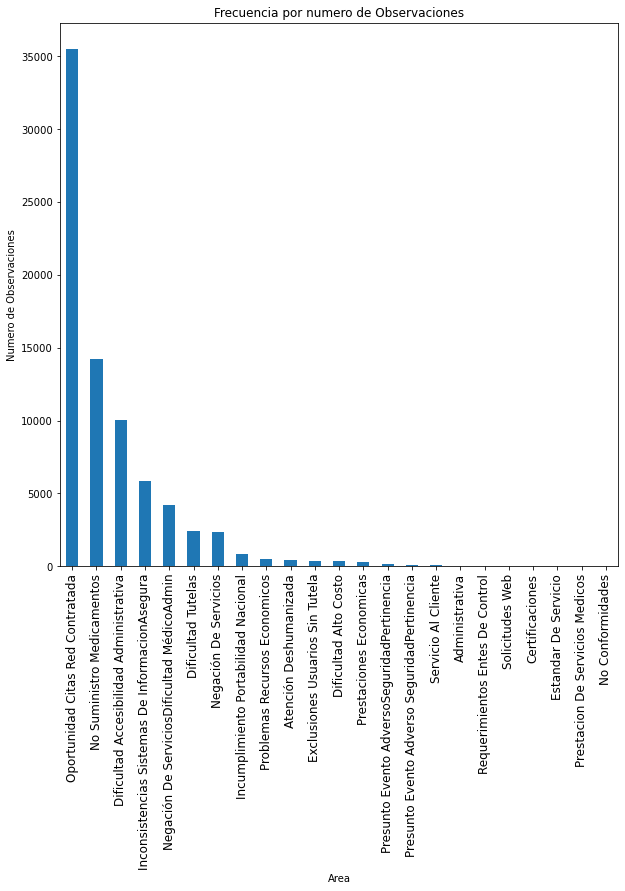

In [124]:
fig, ax = plt.subplots(figsize = (10, 10))
count_classes = pd.value_counts(dfCsv['Area'], sort = True)
count_classes.plot(kind = 'bar', rot=0, ax=ax)
plt.xticks(rotation=90, fontsize=12)
plt.title("Frecuencia por numero de Observaciones")
plt.xlabel("Area")
plt.ylabel("Numero de Observaciones");

In [125]:
dfCsv.Area.value_counts(normalize=True)

Oportunidad Citas Red Contratada                  0.456428
No Suministro Medicamentos                        0.183152
Dificultad Accesibilidad Administrativa           0.128941
Inconsistencias Sistemas De InformacionAsegura    0.075309
Negación De ServiciosDificultad MédicoAdmin       0.054313
Dificultad Tutelas                                0.031005
Negación De Servicios                             0.030170
Incumplimiento Portabilidad Nacional              0.011282
Problemas Recursos Economicos                     0.006078
Atención Deshumanizada                            0.005307
Exclusiones Usuarios Sin Tutela                   0.004883
Dificultad Alto Costo                             0.004793
Prestaciones Economicas                           0.004215
Presunto Evento AdversoSeguridadPertinencia       0.001825
Presunto Evento Adverso SeguridadPertinencia      0.001092
Servicio Al Cliente                               0.000809
Administrativa                                    0.0001

In [126]:
l = ['Problemas Recursos Economicos','Atención Deshumanizada','Exclusiones Usuarios Sin Tutela','Dificultad Alto Costo',
     'Prestaciones Economicas','Presunto Evento AdversoSeguridadPertinencia','Presunto Evento Adverso SeguridadPertinencia',
     'Servicio Al Cliente','Administrativa','Requerimientos Entes De Control','Certificaciones','Prestacion De Servicios Medicos',
     'No Conformidades','Estandar De Servicio','Incumplimiento Portabilidad Nacional','Dificultad Tutelas','Negación De Servicios','Solicitudes Web']                          

dfCsv.Area = dfCsv.Area.replace(l, 'Otro')
#dfCsv=dfCsv[dfCsv.Area!="Otro"]

C:\Users\jrm20\AppData\Roaming\Python\Python38\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [127]:
print(dfCsv.shape)
print(pd.value_counts(dfCsv['Area'], sort = True))

(77826, 2)
Oportunidad Citas Red Contratada                  35522
No Suministro Medicamentos                        14254
Dificultad Accesibilidad Administrativa           10035
Otro                                               7927
Inconsistencias Sistemas De InformacionAsegura     5861
Negación De ServiciosDificultad MédicoAdmin        4227
Name: Area, dtype: int64


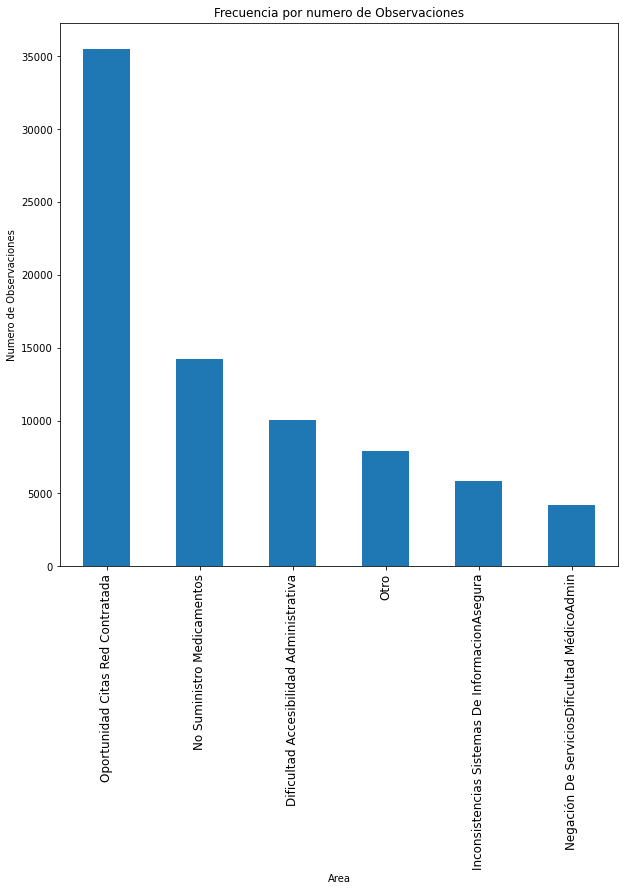

In [128]:
fig, ax = plt.subplots(figsize = (10, 10))
count_classes = pd.value_counts(dfCsv['Area'], sort = True)
count_classes.plot(kind = 'bar', rot=0, ax=ax)
plt.xticks(rotation=90, fontsize=12)
plt.title("Frecuencia por numero de Observaciones")
plt.xlabel("Area")
plt.ylabel("Numero de Observaciones");

In [129]:
dfCsv.Area.value_counts(normalize=True)

Oportunidad Citas Red Contratada                  0.456428
No Suministro Medicamentos                        0.183152
Dificultad Accesibilidad Administrativa           0.128941
Otro                                              0.101855
Inconsistencias Sistemas De InformacionAsegura    0.075309
Negación De ServiciosDificultad MédicoAdmin       0.054313
Name: Area, dtype: float64

In [130]:
dfCsv.to_csv(path_or_buf="../Data/epsPQRS.csv",sep=";",index=False, encoding='utf-8-sig')